In [60]:
%matplotlib inline

In [62]:
import networkx as nx
import preprocessing as prep
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import json
import os
import datetime
import pytz
import matplotlib.pyplot as plt
from collections import Counter
from bb_binary import load_frame_container, Repository
from pandas import Series, DataFrame
import sqlite3

# Closeness 160px 6ilen

In [63]:
G = nx.read_graphml("networks-days/2015-08-21T00:00:00Z_1d_allCams_0.99conf_160dist_6ilen.graphml")

In [64]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1202
Number of edges: 152449
Average degree: 253.6589


In [65]:
closenessc = nx.closeness.closeness_centrality(G)

## Closeness VS RGG

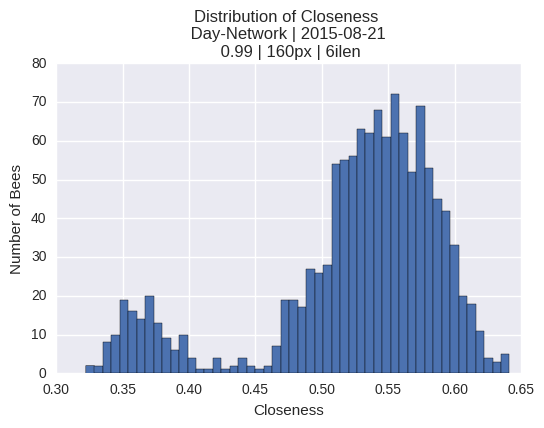

In [72]:
Series(closenessc).hist(bins=50)
plt.axes().set_xlabel("Closeness")
plt.axes().set_ylabel("Number of Bees")
plt.axes().set_title("Distribution of Closeness \n Day-Network | 2015-08-21 \n 0.99 | 160px | 6ilen")

In [ ]:
# rgg = nx.random_geometric_graph(len(G.nodes()), 0.053)

In [ ]:
# rgg_closenessc = nx.closeness.closeness_centrality(rgg)
# Series(rgg_closenessc).hist(bins=50)

## Grenze bei 0.45

In [84]:
line = 0.45
s = Series(closenessc)
smaller = s[s < line]
bigger = s[s >= line]
IDsmaller = [int(i) for i in smaller.index]
IDbigger = [int(i) for i in bigger.index] 

In [89]:
len(IDsmaller)

148

In [88]:
len(IDbigger)

1054

## Positionsdaten pro Biene rausfischen für linken und rechten Berg und plotten

In [77]:
import sqlite3

In [78]:
db_path = "/storage/mi/aschle/data.db"
conn = sqlite3.connect(db_path)
c = conn.cursor()

In [175]:
def plotClosenessXYBee(txt, df, beeid, camIDleft, camIDright):
    data_l = df[df.CAM_ID == camIDleft]
    data_l = data_l[data_l.ID == beeid]
    data_r = df[df.CAM_ID == camIDright]
    data_r = data_r[data_r.ID == beeid]
    data_r.XPOS = data_r.XPOS + 3000
    data = pd.concat([data_l,data_r])
    data.plot.scatter(x='XPOS', y="YPOS",s=1, xlim=(0,6000),ylim=(0,4000), alpha=0.2)
    plt.axes().set_aspect('equal')
    plt.axes().set_title("{} \nCam {} & Cam {}".format(txt, str(camIDleft), str(camIDright)))
    

In [119]:
def plotClosenessXY(txt, df, camIDleft, camIDright, s=5000):
    data_l = df[df.CAM_ID == camIDleft].sample(s)
    data_r = df[df.CAM_ID == camIDright].sample(s)
    data_r.XPOS = data_r.XPOS + 3000
    data = pd.concat([data_l,data_r])
    data.plot.scatter(x='XPOS', y="YPOS",s=1, xlim=(0,6000),ylim=(0,4000), alpha=0.2)
    plt.axes().set_aspect('equal')
    plt.axes().set_title("{} \nCam {} & Cam {}".format(txt, str(camIDleft), str(camIDright)))

In [79]:
def getDFwithIDS(ids, conn):
    ids_str = ', '.join([str(x) for x in ids])
    sql = '''
        SELECT d.XPOS, d.YPOS, d.ID, fc.CAM_ID
        FROM DETECTIONS d
        INNER JOIN FRAME f
        ON d.FRAME_ID=f.FRAME_ID
        INNER JOIN FRAME_CONTAINER fc
        ON f.FC_ID=fc.FC_ID
        WHERE d.ID IN ({});
    '''.format(ids_str)
    return pd.read_sql(sql, conn)

In [81]:
df_s = getDFwithIDS(IDsmaller, conn)

In [102]:
df_s.shape[0]/len(IDsmaller)

414.7905405405405

In [114]:
df_b.shape[0]

59012227

In [115]:
len(IDbigger)

1054

In [112]:
df_s.groupby(by="ID").size().describe()

count     148.000000
mean      414.790541
std       440.550680
min        15.000000
25%       169.750000
50%       282.500000
75%       479.750000
max      3126.000000
dtype: float64

In [116]:
df_b.groupby(by="ID").size().describe()

count      1054.000000
mean      55988.830171
std       29062.408189
min        2799.000000
25%       34290.250000
50%       53876.000000
75%       76002.500000
max      165090.000000
dtype: float64

In [190]:
df_b.groupby(by="ID").size()

ID
12       47419
24       34414
40       73146
48       63999
60       29229
68       51081
72       90110
80       56841
92       63177
96       72443
108      35738
110      19950
116      75615
120      30441
132      67410
136      46734
144      43889
156       5336
160      35128
172      47835
180      41615
184      18764
192      57064
204      38149
212      29160
216      30646
228      45860
232      71829
240      56306
252      67841
         ...  
4019     94340
4022     83021
4025     45094
4028     62722
4030     28944
4031     38409
4034     47902
4035     19739
4037    106197
4039     81908
4043     22081
4046     98778
4047     19757
4049     59265
4052     26676
4054     87931
4058     56427
4060      6433
4061     48494
4063     55337
4067     99328
4069     98288
4071     39561
4077     47204
4078     47215
4082    102672
4084     21530
4089      6465
4093    101941
4094     28270
dtype: int64

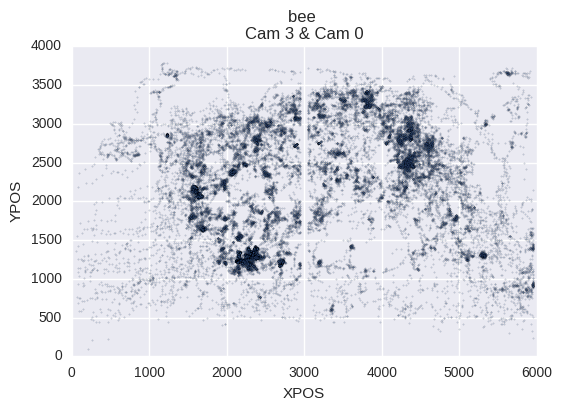

In [194]:
plotClosenessXYBee("bee", df_b, 4093, 3,0)

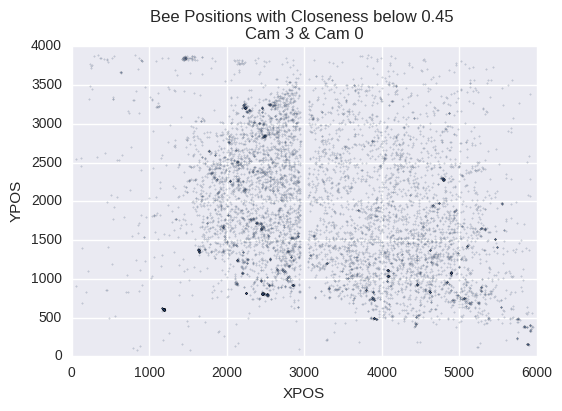

In [134]:
plotClosenessXY("Bee Positions with Closeness below 0.45", df_s, 3, 0, s=4000)

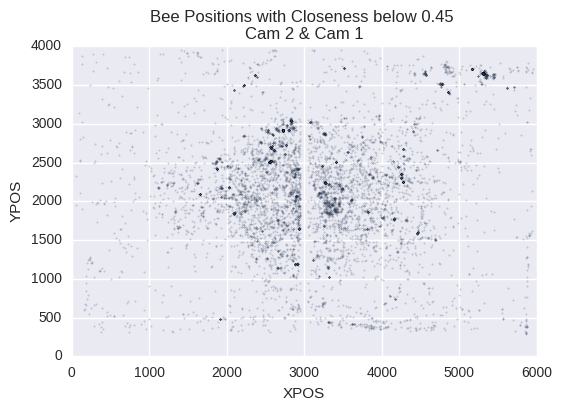

In [133]:
plotClosenessXY("Bee Positions with Closeness below 0.45", df_s, 2, 1, s=4000)

In [95]:
df_b = getDFwithIDS(IDbigger, conn)

In [96]:
df_b.shape

(59012227, 4)

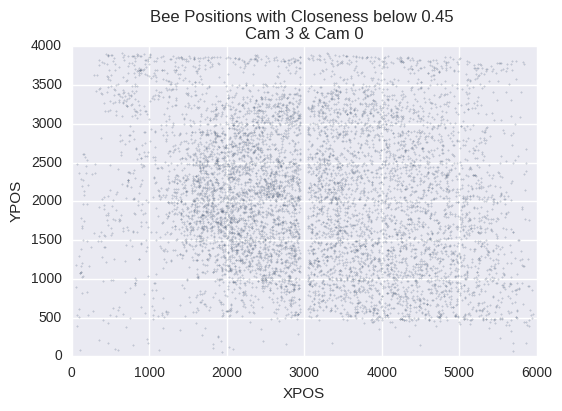

In [135]:
plotClosenessXY("Bee Positions with Closeness below 0.45", df_b, 3, 0,s=4000)

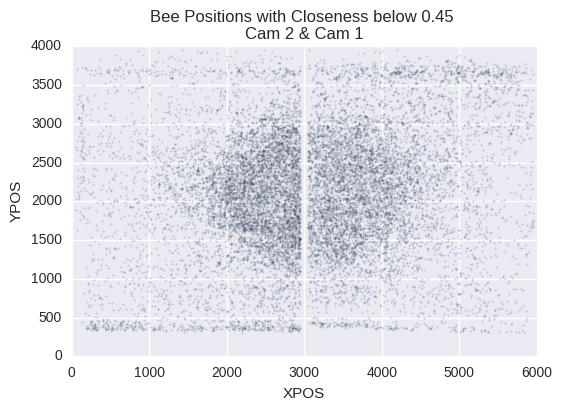

In [126]:
plotClosenessXY("Bee Positions with Closeness below 0.45", df_b, 2, 1, s=8000)

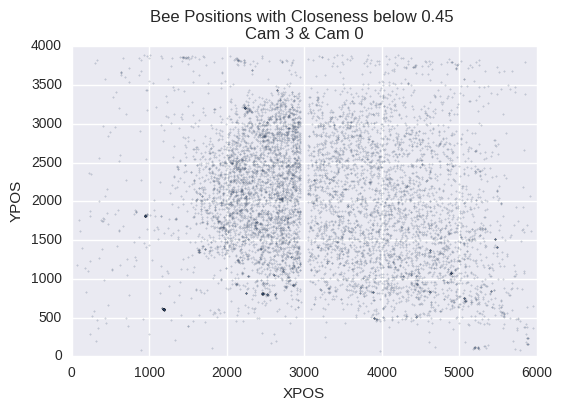

In [127]:
plotClosenessXY("Bee Positions with Closeness below 0.45", df_s3, 3, 0, s=4000)

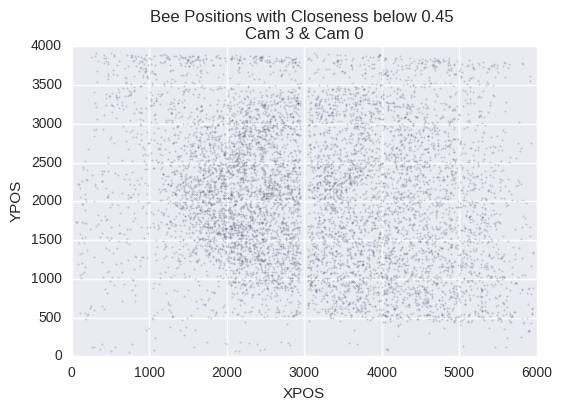

In [128]:
plotClosenessXY("Bee Positions with Closeness below 0.45", df_b3, 3, 0, s=4000)

## Heatmap

In [27]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

In [226]:
def plotHeatmapXY(txt, df, camIDleft, camIDright, s=5000):
    data_l = df[df.CAM_ID == camIDleft].sample(s)
    data_r = df[df.CAM_ID == camIDright].sample(s)
    data_r.XPOS = data_r.XPOS + 3000

    data = pd.concat([data_l,data_r])
    x = data.XPOS
    y = data.YPOS
    
#     heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
#     extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
#     plt.clf()
#     plt.imshow(heatmap.T, extent=extent, origin='lower')
#     plt.show()
    
#     plt.hexbin(x,y)
#     plt.show()

    H, xedges, yedeges, im = plt.hist2d(x,y,bins=[60,40], cmap='jet', vmin = 0, vmax = 130)
    plt.colorbar()
    plt.axes().set_title("{} \nCam {} & Cam {}".format(txt, str(camIDleft), str(camIDright)))
    
    return H
#     data.plot.scatter(x='XPOS', y="YPOS",s=1, xlim=(0,6000),ylim=(0,4000), alpha=0.2)
#     plt.axes().set_aspect('equal')
#     plt.axes().set_title("{} \nCam {} & Cam {}".format(txt, str(camIDleft), str(camIDright)))

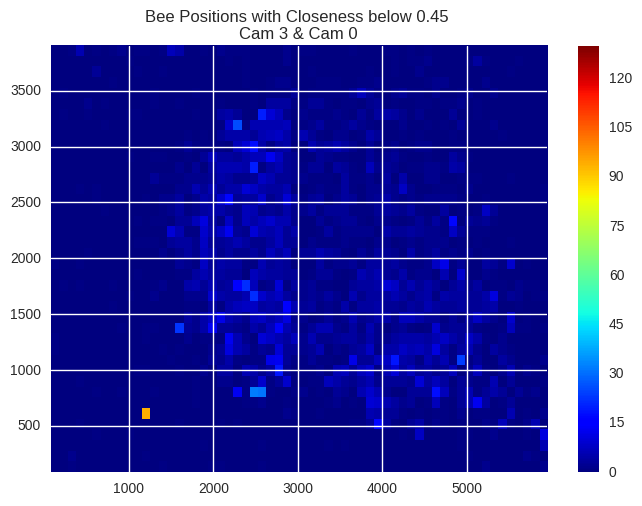

In [227]:
H = plotHeatmapXY("Bee Positions with Closeness below 0.45", df_s, 3, 0, s=2000)

In [228]:
H.max()

94.0

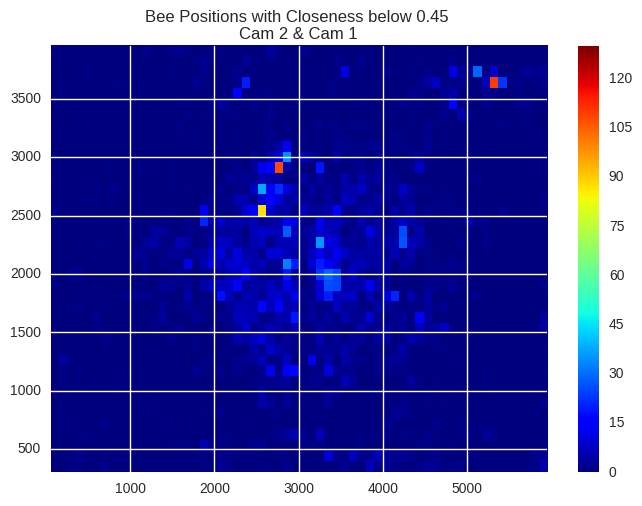

In [229]:
H = plotHeatmapXY("Bee Positions with Closeness below 0.45", df_s, 2, 1, s=2000)

In [230]:
H.max()

110.0

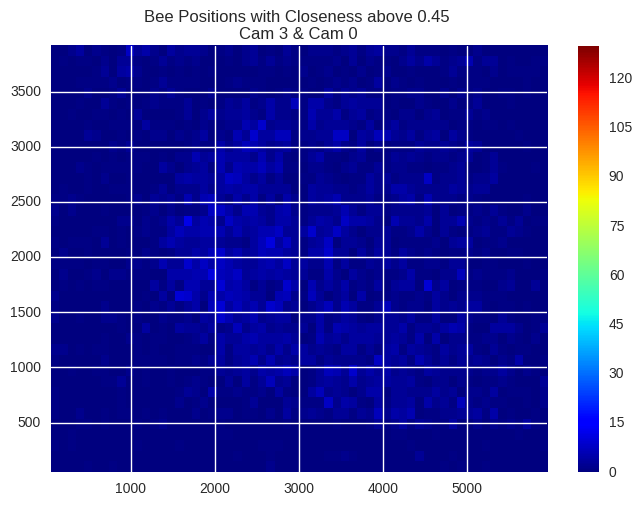

In [231]:
H = plotHeatmapXY("Bee Positions with Closeness above 0.45", df_b, 3, 0, s=2000)

In [232]:
H.max()

12.0

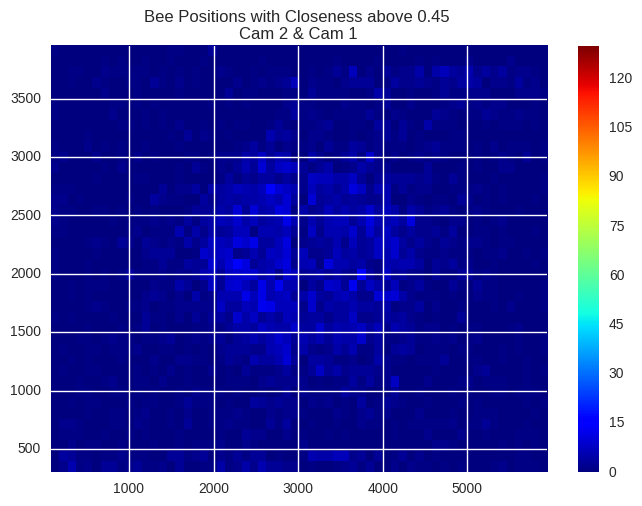

In [233]:
H = plotHeatmapXY("Bee Positions with Closeness above 0.45", df_b, 2, 1, s=2000)

In [225]:
H.max()

39.0

# Closeness 160px 3ilen

In [74]:
G3 = nx.read_graphml("2015-08-21T00:00:00Z_1d_allCams_0.99conf_160dist_3ilen.graphml")

In [75]:
print(nx.info(G3))

Name: 
Type: Graph
Number of nodes: 1679
Number of edges: 302998
Average degree: 360.9267


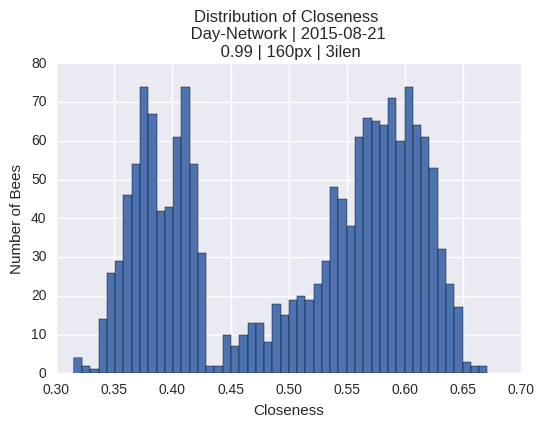

In [76]:
closenessc3 = nx.closeness.closeness_centrality(G3)
Series(closenessc3).hist(bins=50)
plt.axes().set_xlabel("Closeness")
plt.axes().set_ylabel("Number of Bees")
plt.axes().set_title("Distribution of Closeness \n Day-Network | 2015-08-21 \n 0.99 | 160px | 3ilen")

In [91]:
def getIDs(closeness, border):
    line = border
    s = Series(closeness)
    smaller = s[s < line]
    bigger = s[s >= line]
    IDsmaller = [int(i) for i in smaller.index]
    IDbigger = [int(i) for i in bigger.index]
    
    return IDsmaller,IDbigger

In [92]:
small3, big3 = getIDs(closenessc3, 0.425)

In [93]:
len(small3)

614

In [94]:
len(big3)

1065

In [15]:
db_path = "/storage/mi/aschle/data.db"
conn = sqlite3.connect(db_path)
c = conn.cursor()

In [97]:
df_s3 = getDFwithIDS(small3, conn)

In [117]:
df_s3.shape[0]/len(small3)

252.43811074918565

In [100]:
df_b3 = getDFwithIDS(big3, conn)

In [118]:
df_b3.shape[0]/len(big3)

55423.23004694836

In [21]:
def plotHeatmapXYfrac(txt, df, camIDleft, camIDright, f=0.5):
    data_l = df[df.CAM_ID == camIDleft].sample(frac=f)
    data_r = df[df.CAM_ID == camIDright].sample(frac=f)
    data_r.XPOS = data_r.XPOS + 3000

    data = pd.concat([data_l,data_r])
    x = data.XPOS
    y = data.YPOS

    H, xedges, yedeges, im = plt.hist2d(x, y, bins=[60,40], cmap='viridis') #vmin = 0, vmax = vmax)
    plt.colorbar()
    plt.axes().set_title("{} \nCam {} & Cam {}".format(txt, str(camIDleft), str(camIDright)))
    
    return H

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   1., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ..., 
       [  0.,   4.,   1., ...,   1.,   0.,   0.],
       [  1.,   0.,   3., ...,   1.,   1.,   0.],
       [  2.,  21.,  11., ...,   1.,   0.,   1.]])

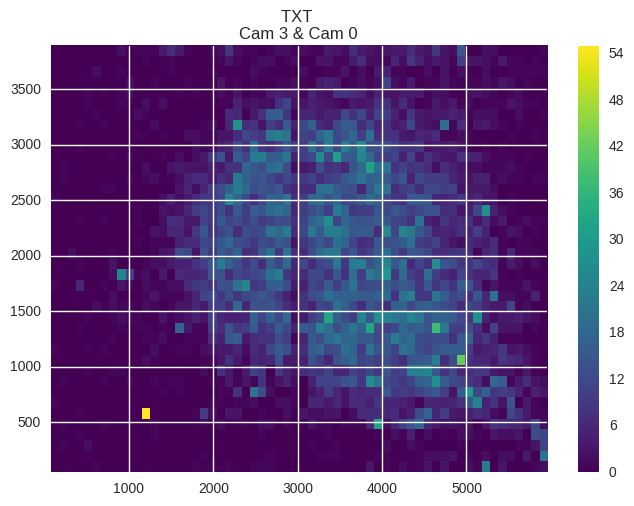

In [24]:
plotHeatmapXYfrac("TXT", df_s3, 3, 0, 0.1)

array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 1.,  0.,  0., ...,  1.,  1.,  0.],
       [ 3.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 1.,  0.,  0., ...,  1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.]])

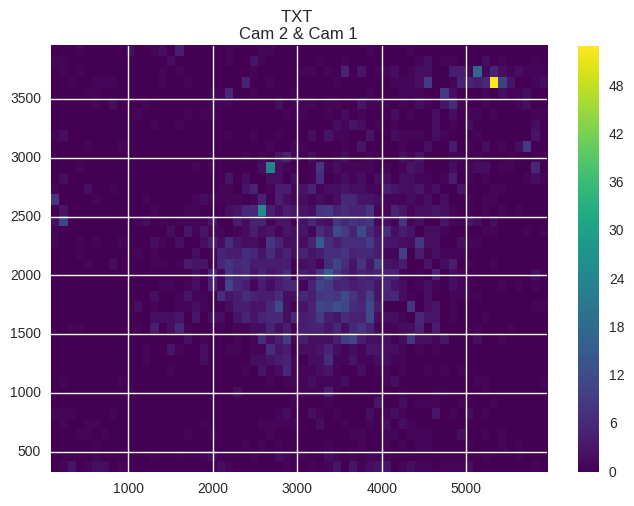

In [25]:
plotHeatmapXYfrac("TXT", df_s3, 2, 1, 0.1)

array([[  98.,   37.,   86., ...,    0.,    0.,    0.],
       [ 116.,   58.,   54., ...,   19.,   18.,  139.],
       [ 125.,   65.,   61., ...,  141.,  412.,  596.],
       ..., 
       [  29.,   60.,  653., ...,  576.,  651.,    9.],
       [  28.,  107.,  243., ...,  336.,  472.,    2.],
       [ 100.,  138.,  697., ...,  147.,  351.,    0.]])

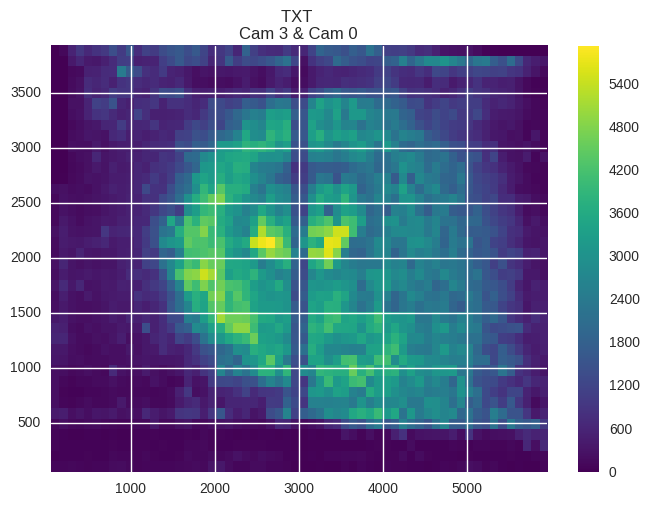

In [26]:
plotHeatmapXYfrac("TXT", df_b3, 3, 0, 0.1)

array([[   24.,     7.,    14., ...,   111.,    54.,    62.],
       [  572.,   721.,   350., ...,   284.,    40.,    57.],
       [ 1143.,  1133.,   301., ...,   226.,    45.,    63.],
       ..., 
       [  559.,   136.,   178., ...,   676.,    52.,    52.],
       [  651.,   304.,   179., ...,   438.,   107.,    62.],
       [  136.,    60.,    47., ...,   782.,   153.,    47.]])

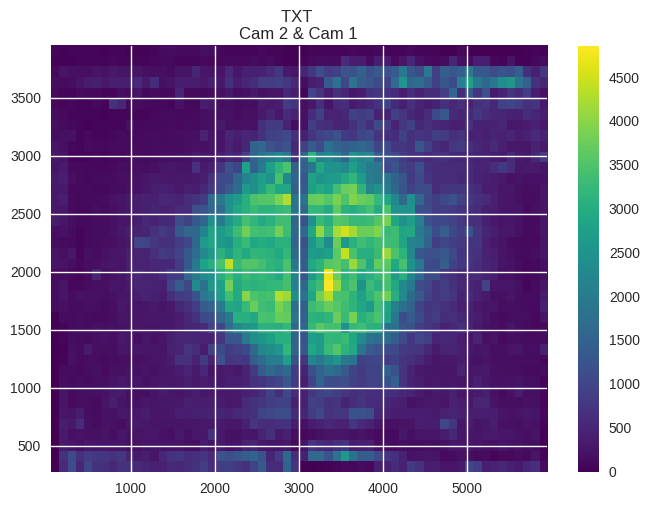

In [27]:
plotHeatmapXYfrac("TXT", df_b3, 2, 1, 0.1)

In [54]:
def plotHeatmapXY(txt, df, camIDleft, camIDright, s=10000):
    data_l = df[df.CAM_ID == camIDleft].sample(n=s)
    data_r = df[df.CAM_ID == camIDright].sample(n=s)
    data_r.XPOS = data_r.XPOS + 3000

    data = pd.concat([data_l,data_r])
    x = data.XPOS
    y = data.YPOS

    H, xedges, yedeges, im = plt.hist2d(x, y, bins=[60,40], cmap='viridis') #vmin = 0, vmax = vmax)
    plt.colorbar()
    plt.axes().set_title("{} \nCam {} & Cam {}".format(txt, str(camIDleft), str(camIDright)))
    
    return H

array([[  3.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  1.,   0.,   0., ...,   0.,   0.,   2.],
       ..., 
       [  0.,   5.,   1., ...,   5.,   2.,   0.],
       [  0.,   2.,   0., ...,   3.,   3.,   0.],
       [  0.,  19.,   4., ...,   0.,   0.,   0.]])

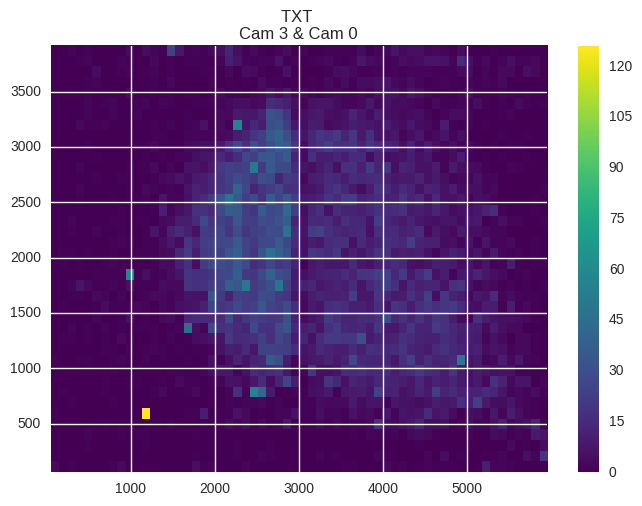

In [55]:
plotHeatmapXY("TXT", df_s3, 3, 0, s = 8000)

array([[  1.,   0.,   0., ...,   0.,   2.,   2.],
       [  1.,  11.,   4., ...,   0.,   3.,   0.],
       [ 18.,  17.,   0., ...,   1.,   5.,   2.],
       ..., 
       [  0.,   0.,   0., ...,  14.,   1.,   1.],
       [  1.,   2.,   0., ...,  10.,   2.,   0.],
       [  0.,   0.,   0., ...,   9.,   1.,   0.]])

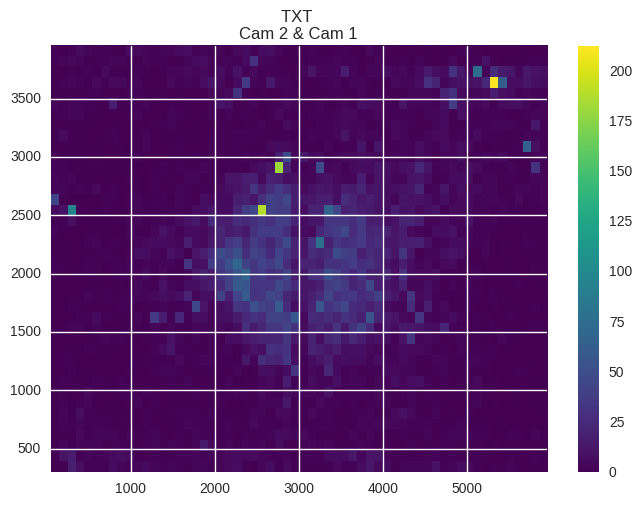

In [56]:
plotHeatmapXY("TXT", df_s3, 2, 1,s = 8000)

array([[ 2.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  1.,  0.,  0.],
       [ 2.,  0.,  0., ...,  0.,  1.,  5.],
       ..., 
       [ 2.,  0.,  1., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  5.,  1.,  1.],
       [ 0.,  1.,  4., ...,  0.,  2.,  0.]])

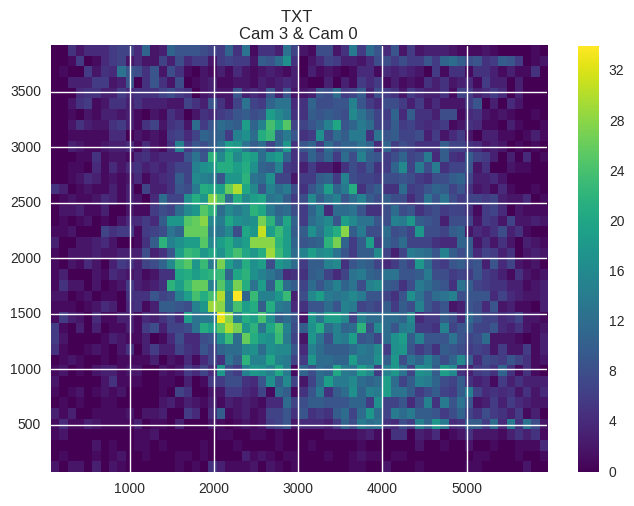

In [57]:
plotHeatmapXY("TXT", df_b3, 3, 0, s = 8000)

array([[  1.,   1.,   0., ...,   0.,   1.,   1.],
       [  7.,   5.,   2., ...,   6.,   0.,   1.],
       [ 10.,   6.,   3., ...,   1.,   0.,   0.],
       ..., 
       [  3.,   2.,   1., ...,   9.,   0.,   1.],
       [  5.,   0.,   1., ...,   2.,   0.,   0.],
       [  0.,   1.,   2., ...,   7.,   2.,   0.]])

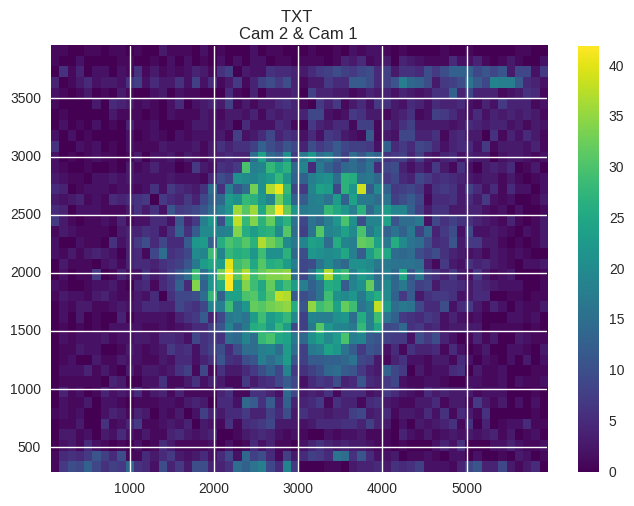

In [58]:
plotHeatmapXY("TXT", df_b3, 2, 1, s = 8000)

# Bienen im rechten Berg anschauen

In [136]:
len(IDbigger)

1054

In [137]:
len(big3)

1065

In [141]:
len(set(IDbigger).intersection(big3))

1054

In [142]:
len(IDsmaller)

148

In [143]:
len(small3)

614

In [144]:
len(set(IDsmaller).intersection(small3))

137

In [149]:
len(.intersection((big3 + small3)))

1202

In [153]:
x = set(IDbigger + IDsmaller)
y = set(big3+small3)

In [156]:
diff = y.difference(x)

In [160]:
set(small3).intersection(diff)

{4,
 11,
 14,
 20,
 32,
 44,
 59,
 66,
 69,
 71,
 73,
 77,
 82,
 86,
 94,
 98,
 107,
 117,
 122,
 130,
 146,
 158,
 161,
 163,
 167,
 171,
 181,
 194,
 195,
 199,
 200,
 211,
 215,
 256,
 262,
 266,
 270,
 276,
 277,
 283,
 286,
 299,
 304,
 305,
 306,
 319,
 322,
 325,
 334,
 335,
 355,
 363,
 367,
 369,
 370,
 375,
 376,
 402,
 416,
 418,
 421,
 425,
 426,
 427,
 429,
 439,
 469,
 470,
 482,
 483,
 491,
 506,
 508,
 512,
 518,
 529,
 533,
 539,
 542,
 545,
 554,
 555,
 575,
 577,
 578,
 581,
 585,
 593,
 594,
 595,
 598,
 599,
 611,
 613,
 614,
 617,
 619,
 629,
 631,
 638,
 642,
 645,
 650,
 651,
 655,
 659,
 661,
 662,
 663,
 665,
 666,
 673,
 677,
 681,
 687,
 689,
 695,
 697,
 699,
 705,
 707,
 725,
 730,
 737,
 747,
 754,
 777,
 778,
 786,
 789,
 794,
 809,
 837,
 841,
 842,
 853,
 854,
 855,
 857,
 858,
 863,
 878,
 882,
 886,
 889,
 893,
 895,
 897,
 899,
 906,
 915,
 925,
 926,
 927,
 931,
 969,
 977,
 983,
 1003,
 1011,
 1012,
 1021,
 1029,
 1035,
 1064,
 1065,
 1067,
 1070,

In [150]:
x = set(big3)

{2, 3}

In [163]:
occurence = pd.concat([df_s, df_b]).groupby(by="ID").size()

In [170]:
occurence.loc[18]

80

In [173]:
[i for i in closenessc3]

['2966',
 '3689',
 '850',
 '1769',
 '2059',
 '1910',
 '896',
 '2825',
 '343',
 '800',
 '3817',
 '2322',
 '4015',
 '1344',
 '2774',
 '2704',
 '1507',
 '260',
 '3848',
 '3858',
 '305',
 '1490',
 '2839',
 '3657',
 '3502',
 '1560',
 '2318',
 '854',
 '2953',
 '3526',
 '524',
 '668',
 '2200',
 '3733',
 '2594',
 '4060',
 '3550',
 '3971',
 '3448',
 '117',
 '24',
 '2978',
 '624',
 '300',
 '3835',
 '3856',
 '1491',
 '1378',
 '3751',
 '2870',
 '844',
 '616',
 '789',
 '3673',
 '536',
 '2324',
 '1712',
 '2738',
 '592',
 '3265',
 '1168',
 '3779',
 '1360',
 '3753',
 '3402',
 '3250',
 '3509',
 '2851',
 '2551',
 '4010',
 '4094',
 '768',
 '4007',
 '3633',
 '2714',
 '2688',
 '167',
 '2693',
 '3898',
 '837',
 '66',
 '77',
 '2843',
 '2088',
 '1016',
 '882',
 '1641',
 '3017',
 '2911',
 '2279',
 '2214',
 '3593',
 '2234',
 '2104',
 '2499',
 '1783',
 '335',
 '2049',
 '2507',
 '2734',
 '915',
 '2090',
 '3827',
 '3947',
 '3982',
 '702',
 '1483',
 '18',
 '2746',
 '4049',
 '3056',
 '4006',
 '1956',
 '2111',
 '2970